In [3]:
# # configuring the path of Kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# # API to fetch the dataset from Kaggle
# !kaggle datasets download -d omkargurav/face-mask-dataset

In [5]:
# # extracting the compessed Dataset
# from zipfile import ZipFile
# dataset = '/content/face-mask-dataset.zip'

# with ZipFile(dataset,'r') as zip:
#   zip.extractall()
#   print('The dataset is extracted')

In [6]:
# !ls

**Importing the Dependencies**

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import random
import os

In [8]:
import os
with_mask_files = os.listdir('archive\data')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['without_mask', 'with_mask']
['without_mask', 'with_mask']


In [9]:
without_mask_files = os.listdir('archive\data\without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 2
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [11]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [12]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

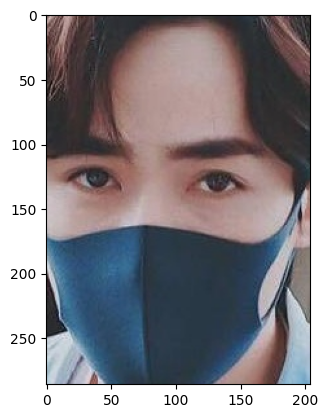

In [15]:
# displaying with mask image
img = mpimg.imread('archive\data\with_mask\with_mask_1544.jpg')
imgplot = plt.imshow(img)
plt.show()

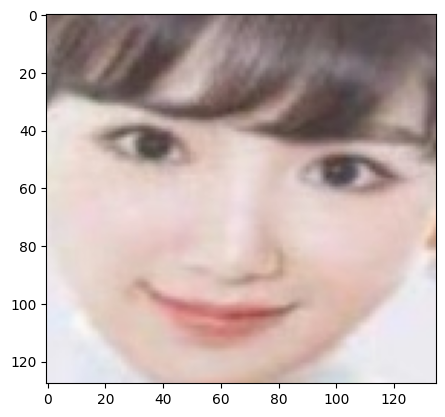

In [16]:
# displaying without mask image

img = mpimg.imread('archive\data\without_mask\without_mask_2924.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [17]:
import os
from PIL import Image
import numpy as np

with_mask_path = 'archive\data\with_mask'
with_mask_files = os.listdir(with_mask_path)

data = []

for img_file in with_mask_files:
    img_path = os.path.join(with_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

without_mask_path = 'archive\data\without_mask'
without_mask_files = os.listdir(without_mask_path)

for img_file in without_mask_files:
    img_path = os.path.join(without_mask_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


c:\Users\Amar\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

In [20]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [31]:
X_train[0]

array([[[226, 234, 201],
        [211, 216, 188],
        [188, 188, 169],
        ...,
        [186, 181, 165],
        [179, 175, 150],
        [166, 181, 136]],

       [[224, 228, 218],
        [201, 204, 195],
        [201, 199, 192],
        ...,
        [197, 190, 182],
        [175, 170, 153],
        [162, 180, 143]],

       [[205, 204, 212],
        [221, 220, 226],
        [195, 192, 196],
        ...,
        [183, 174, 173],
        [172, 167, 159],
        [181, 199, 171]],

       ...,

       [[156, 176, 197],
        [159, 180, 196],
        [164, 185, 196],
        ...,
        [ 89,  99,  71],
        [106, 113,  83],
        [ 99, 103,  68]],

       [[151, 177, 196],
        [167, 190, 208],
        [174, 192, 210],
        ...,
        [106, 113,  80],
        [ 99, 104,  64],
        [ 98,  98,  41]],

       [[162, 192, 210],
        [177, 199, 220],
        [175, 189, 213],
        ...,
        [103, 107,  70],
        [ 79,  80,  46],
        [ 99,  94,  61]]

In [32]:
X_train_scaled[0]

array([[[0.88627451, 0.91764706, 0.78823529],
        [0.82745098, 0.84705882, 0.7372549 ],
        [0.7372549 , 0.7372549 , 0.6627451 ],
        ...,
        [0.72941176, 0.70980392, 0.64705882],
        [0.70196078, 0.68627451, 0.58823529],
        [0.65098039, 0.70980392, 0.53333333]],

       [[0.87843137, 0.89411765, 0.85490196],
        [0.78823529, 0.8       , 0.76470588],
        [0.78823529, 0.78039216, 0.75294118],
        ...,
        [0.77254902, 0.74509804, 0.71372549],
        [0.68627451, 0.66666667, 0.6       ],
        [0.63529412, 0.70588235, 0.56078431]],

       [[0.80392157, 0.8       , 0.83137255],
        [0.86666667, 0.8627451 , 0.88627451],
        [0.76470588, 0.75294118, 0.76862745],
        ...,
        [0.71764706, 0.68235294, 0.67843137],
        [0.6745098 , 0.65490196, 0.62352941],
        [0.70980392, 0.78039216, 0.67058824]],

       ...,

       [[0.61176471, 0.69019608, 0.77254902],
        [0.62352941, 0.70588235, 0.76862745],
        [0.64313725, 0

**Building a Convolutional Neural Networks (CNN)**

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 128)               7

In [50]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 378s 2s/step - loss: 0.5396 - acc: 0.7548 - val_loss: 0.2979 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 492s 3s/step - loss: 0.3123 - acc: 0.8755 - val_loss: 0.2301 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 332s 2s/step - loss: 0.2699 - acc: 0.8913 - val_loss: 0.3119 - val_acc: 0.8545
Epoch 4/5
170/170 [==============================] - 187s 1s/step - loss: 0.2307 - acc: 0.9075 - val_loss: 0.2207 - val_acc: 0.9207
Epoch 5/5
170/170 [==============================] - 701s 4s/step - loss: 0.2187 - acc: 0.9143 - val_loss: 0.2486 - val_acc: 0.9256


**Model Evaluation**

In [51]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 217ms/step - loss: 0.2889 - acc: 0.8961
Test Accuracy = 0.8960952758789062


In [39]:
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# earlystop = EarlyStopping(patience = 10)
# learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
# callbacks = [earlystop,learning_rate_reduction]

In [40]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

# # Assuming your input shape is (64, 64, 3) for a 64x64 RGB image
# # Adjust as necessary for your specific use case

# model = Sequential()

# # Add your layers
# model.add(Dense(128, activation='relu', input_shape=(64, 64, 3)))

# # Add a dropout layer with a dropout rate of 0.5
# # 50% of the neurons in the previous layer will be dropped during training
# model.add(Dropout(0.5))

# # Continue adding layers as necessary
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Now you can train your model
# # model.fit(X_train, Y_train, ...)

In [41]:
# df["category"] = df["category"].replace({0:'cat',1:'dog'})
# train_df,validate_df = train_test_split(df,test_size=0.20,
#   random_state=42)

# train_df = train_df.reset_index(drop=True)
# validate_df = validate_df.reset_index(drop=True)

# total_train=train_df.shape[0]
# total_validate=validate_df.shape[0]
# batch_size=15

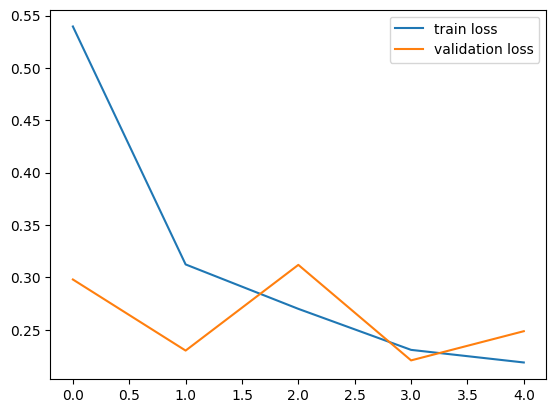

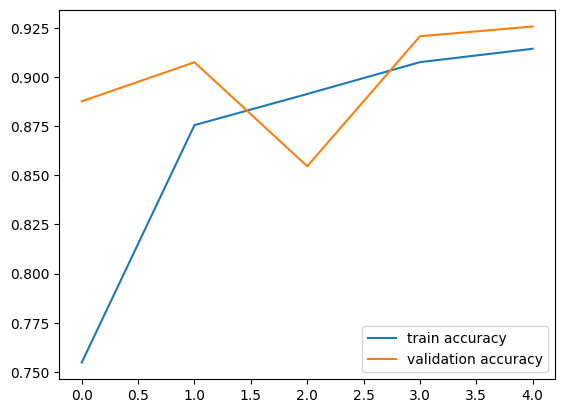

In [42]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

1/1 [==============================] - 0s 136ms/step


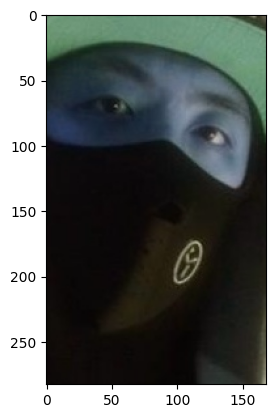

0
The person in the image is not wearing a mask
[[0.5886619  0.36984706]]


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

plt.imshow(input_image)
plt.show()

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

print(input_prediction)


input_pred_label = np.argmax(input_prediction)


1/1 [==============================] - 0s 47ms/step
[[0.56329143 0.42154047]]


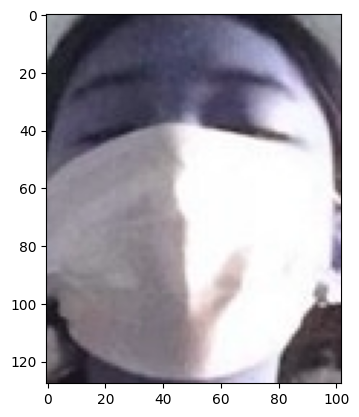

0
The person in the image is not wearing a mask


In [47]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)


input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
plt.imshow(input_image)
plt.show()

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [ ]:
# # import the necessary packages
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.preprocessing.image import img_to_array
# from tensorflow.keras.models import load_model
# from imutils.video import VideoStream
# import numpy as np
# import imutils
# import time
# import cv2
# import os


# def detect_and_predict_mask(frame, faceNet, maskNet):

# 	# grab the dimensions of the frame and 
# 	# then construct a blob from it
# 	(h, w) = frame.shape[:2]
# 	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
# 								(104.0, 177.0, 123.0))

# 	# pass the blob through the network 
# 	# and obtain the face detections
# 	faceNet.setInput(blob)
# 	detections = faceNet.forward()
# 	print(detections.shape)

# 	# initialize our list of faces, their
# 	# corresponding locations, and the list
# 	# of predictions from our face mask network
# 	faces = []
# 	locs = []
# 	preds = []

# 	# loop over the detections
# 	for i in range(0, detections.shape[2]):
	
# 		# extract the confidence (i.e.,
# 		# probability) associated with
# 		# the detection
# 		confidence = detections[0, 0, i, 2]

# 		# filter out weak detections by 
# 		# ensuring the confidence is
# 		# greater than the minimum confidence
# 		if confidence > 0.5:
		
# 			# compute the (x, y)-coordinates
# 			# of the bounding box for
# 			# the object
# 			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
# 			(startX, startY, endX, endY) = box.astype("int")

# 			# ensure the bounding boxes fall 
# 			# within the dimensions of
# 			# the frame
# 			(startX, startY) = (max(0, startX), max(0, startY))
# 			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

# 			# extract the face ROI, convert it
# 			# from BGR to RGB channel
# 			# ordering, resize it to 224x224, 
# 			# and preprocess it
# 			face = frame[startY:endY, startX:endX]
# 			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
# 			face = cv2.resize(face, (224, 224))
# 			face = img_to_array(face)
# 			face = preprocess_input(face)

# 			# add the face and bounding boxes 
# 			# to their respective lists
# 			faces.append(face)
# 			locs.append((startX, startY, endX, endY))

# 	# only make a predictions if at least one
# 	# face was detected
# 	if len(faces) > 0:
	
# 		# for faster inference we'll make 
# 		# batch predictions on *all*
# 		# faces at the same time rather 
# 		# than one-by-one predictions
# 		# in the above `for` loop
# 		faces = np.array(faces, dtype="float32")
# 		preds = maskNet.predict(faces, batch_size=32)

# 	# return a 2-tuple of the face locations
# 	# and their corresponding locations
# 	return (locs, preds)


# # load our serialized face detector model from disk
# prototxtPath = r"face_detector\deploy.prototxt"
# weightsPath = r"face_detector\res10_300x300_ssd_iter_140000.caffemodel"
# faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# # load the face mask detector model from disk
# maskNet = load_model("mask_detector.model")

# # initialize the video stream
# print("[INFO] starting video stream...")
# vs = VideoStream(src=0).start()

# # loop over the frames from the video stream
# while True:
# 	# grab the frame from the threaded 
# 	# video stream and resize it
# 	# to have a maximum width of 400 pixels
# 	frame = vs.read()
# 	frame = imutils.resize(frame, width=400)

# 	# detect faces in the frame and 
# 	# determine if they are wearing a
# 	# face mask or not
# 	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

# 	# loop over the detected face 
# 	# locations and their corresponding
# 	# locations
# 	for (box, pred) in zip(locs, preds):
	
# 		# unpack the bounding box and predictions
# 		(startX, startY, endX, endY) = box
# 		(mask, withoutMask) = pred

# 		# determine the class label and 
# 		# color we'll use to draw
# 		# the bounding box and text
# 		label = "Mask" if mask > withoutMask else "No Mask"
# 		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

# 		# include the probability in the label
# 		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

# 		# display the label and bounding box 
# 		# rectangle on the output frame
# 		cv2.putText(frame, label, (startX, startY - 10),
# 					cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
# 		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

# 	# show the output frame
# 	cv2.imshow("Frame", frame)
# 	key = cv2.waitKey(1) & 0xFF

# 	# if the `q` key was pressed, break from the loop
# 	if key == ord("q"):
# 		break

# # do a bit of cleanup
# cv2.destroyAllWindows()
# vs.stop()
